# EDA for Football Transfers - visualizations

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from general_functions import value_counts, missing_values

In [414]:
df = pd.read_csv("data/df_cleaned.csv")

In [6]:
df_nan = pd.read_csv("data/df_cleaned_not_na.csv")

In [13]:
df

,Player ID,Name,Position,Age,Original Team,Original League,New Team,New League,Season Start,Season End,Estimated Value (mil),Actual Value (mil)
16,Player_17,Robbie Keane,Centre-Forward,19,Coventry City,Premier League,Inter,Serie A,2000,2001,NaN,19.50
267,Player_17,Robbie Keane,Centre-Forward,20,Inter,Serie A,Leeds,Premier League,2001,2002,NaN,18.00
520,Player_17,Robbie Keane,Centre-Forward,21,Leeds,Premier League,Spurs,Premier League,2002,2003,NaN,10.50
1982,Player_17,Robbie Keane,Centre-Forward,28,Spurs,Premier League,Liverpool,Premier League,2008,2009,16.5,24.00
1994,Player_17,Robbie Keane,Centre-Forward,28,Liverpool,Premier League,Spurs,Premier League,2008,2009,21.0,16.70
2952,Player_17,Robbie Keane,Centre-Forward,31,Spurs,Premier League,Los Angeles,MLS,2011,2012,7.0,3.75


In [8]:
df_nan

,Player ID,Name,Position,Age,Original Team,Original League,New Team,New League,Season Start,Season End,Estimated Value (mil),Actual Value (mil)
0,Player_1,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000,2001,0.0,60.00
1,Player_2,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000,2001,0.0,56.81
2,Player_3,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000,2001,0.0,40.00
3,Player_4,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000,2001,0.0,36.15
4,Player_5,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000,2001,0.0,34.50
...,...,...,...,...,...,...,...,...,...,...,...,...
4694,Player_3297,Jasmin Kurtic,Attacking Midfield,29,Atalanta,Serie A,SPAL,Serie A,2018,2019,5.0,4.80
4695,Player_3298,Tchê Tchê,Central Midfield,25,Palmeiras,Série A,Dynamo Kyiv,Premier Liga,2018,2019,3.0,4.80
4696,Player_3299,Silvan Widmer,Right-Back,25,Udinese Calcio,Serie A,FC Basel,Super League,2018,2019,8.5,4.50
4697,Player_3300,Yuya Osako,Second Striker,28,1. FC Köln,2.Bundesliga,Werder Bremen,1.Bundesliga,2018,2019,4.5,4.50


In [9]:
df.describe()

,Age,Season Start,Season End,Estimated Value (mil),Actual Value (mil)
count,4699.000000,4699.000000,4699.000000,3440.000000,4699.000000
mean,24.343903,2009.001702,2010.001702,8.622469,9.449171
std,3.211578,5.470070,5.470070,8.795181,10.438264
min,15.000000,2000.000000,2001.000000,0.050000,0.825000
25%,22.000000,2004.000000,2005.000000,3.500000,4.000000
50%,24.000000,2009.000000,2010.000000,6.000000,6.500000
75%,27.000000,2014.000000,2015.000000,10.000000,10.820000
max,35.000000,2018.000000,2019.000000,120.000000,222.000000


In [10]:
df_nan.describe()

,Age,Season Start,Season End,Estimated Value (mil),Actual Value (mil)
count,4699.000000,4699.000000,4699.000000,4699.000000,4699.000000
mean,24.343903,2009.001702,2010.001702,6.312257,9.449171
std,3.211578,5.470070,5.470070,8.438651,10.438264
min,15.000000,2000.000000,2001.000000,0.000000,0.825000
25%,22.000000,2004.000000,2005.000000,0.000000,4.000000
50%,24.000000,2009.000000,2010.000000,4.000000,6.500000
75%,27.000000,2014.000000,2015.000000,8.100000,10.820000
max,35.000000,2018.000000,2019.000000,120.000000,222.000000


**This is example how inputing data may change the calculations**
- I have two cleaned data files. 
    - For dataset where I left NaNs I can see the minumum value for estimated value of player as well as 25 quantile
    - For dataset where I manually imputed value of 0 I see different results.
- I would use dataset df_nan in different scenario (training model, predicting, etc.). But in this case I opt for "normal dataset" thus df.

## Questions

**Prototype questions from available data. What would I like to know from this dataset? What information can be interesting and can add value?**
1. Actual value in total for each season start
    - How much money was spend every year in total for players?
    - Is amount every year growing? What is the trend?
2. Most transfered league/team
    - Which leagues are the most popular?
    - Which team purchased most players or spend the most
    - Which team is a farm (selling players)?
3. Value of players
    - What are the top highest valued players (pick outliers)?
    - How much does estimated value differ from actuall value?
4. Position
    - Which positions are most traded?
5. Player
     - Which players were traded the most?
     - What is their price?
6. Characteristics
    - What influence player value?

In [21]:
df

,Player ID,Name,Position,Age,Original Team,Original League,New Team,New League,Season Start,Season End,Estimated Value (mil),Actual Value (mil)
0,Player_1,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000,2001,NaN,60.00
1,Player_2,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000,2001,NaN,56.81
2,Player_3,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000,2001,NaN,40.00
3,Player_4,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000,2001,NaN,36.15
4,Player_5,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000,2001,NaN,34.50
...,...,...,...,...,...,...,...,...,...,...,...,...
4694,Player_3297,Jasmin Kurtic,Attacking Midfield,29,Atalanta,Serie A,SPAL,Serie A,2018,2019,5.0,4.80
4695,Player_3298,Tchê Tchê,Central Midfield,25,Palmeiras,Série A,Dynamo Kyiv,Premier Liga,2018,2019,3.0,4.80
4696,Player_3299,Silvan Widmer,Right-Back,25,Udinese Calcio,Serie A,FC Basel,Super League,2018,2019,8.5,4.50
4697,Player_3300,Yuya Osako,Second Striker,28,1. FC Köln,2.Bundesliga,Werder Bremen,1.Bundesliga,2018,2019,4.5,4.50


## Season Spending - total amount

In [77]:
season_spend = df.groupby("Season Start")["Actual Value (mil)"].sum()/1000

In [84]:
season_spend.dtype

dtype('float64')

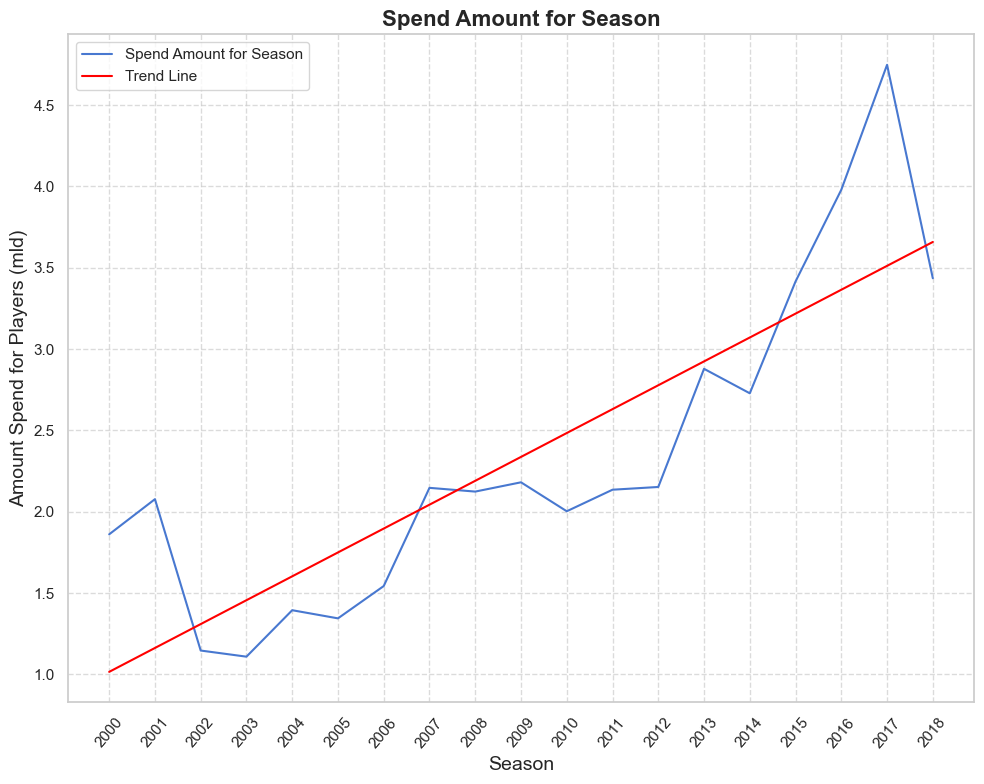

In [87]:
plt.figure(figsize=(10,8))

slope, intercept = np.polyfit(season_spend.index.astype(int), season_spend.values, 1)
trend_line = slope * season_spend.index.astype(int) + intercept

plt.plot(season_spend.index, season_spend.values, label="Spend Amount for Season")
plt.plot(season_spend.index, trend_line, color='red', label="Trend Line")


plt.xlabel("Season", fontsize=14)
plt.ylabel("Amount Spend for Players (mld)",fontsize=14 )
plt.title("Spend Amount for Season", fontsize=16, weight="bold")

plt.xticks(ticks=sorted(df["Season Start"].unique()), rotation=50)
plt.grid(True, which='major', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show() 

### Insights

**Seasonal trends**
1. The period 2002-2006 was relatively stable with low spending (around 1.5 mld)
2. The period 2007-2012 was also stable but succeding spending from year 2001
3. 2013 was the year that amount spend created record. With slow break in 2014, it raised continually
4. 2017 was unique year. Clubs spend the most amount money cummulatively. In this year probably happens lots of transfers. Might be interesting to see outlieres.
5. 2018 started to return probably to normal amount spendings.
- **Trend line shows positive slope. Amount spending clearly raised every season. CLubs tend to spend more money on purchasing players. Year 2017 was one of the most expensive. But based on trend line I would assume that future years (at that time) would  have spending around 3.5-4 mld for season and would not return to values before 2013.**

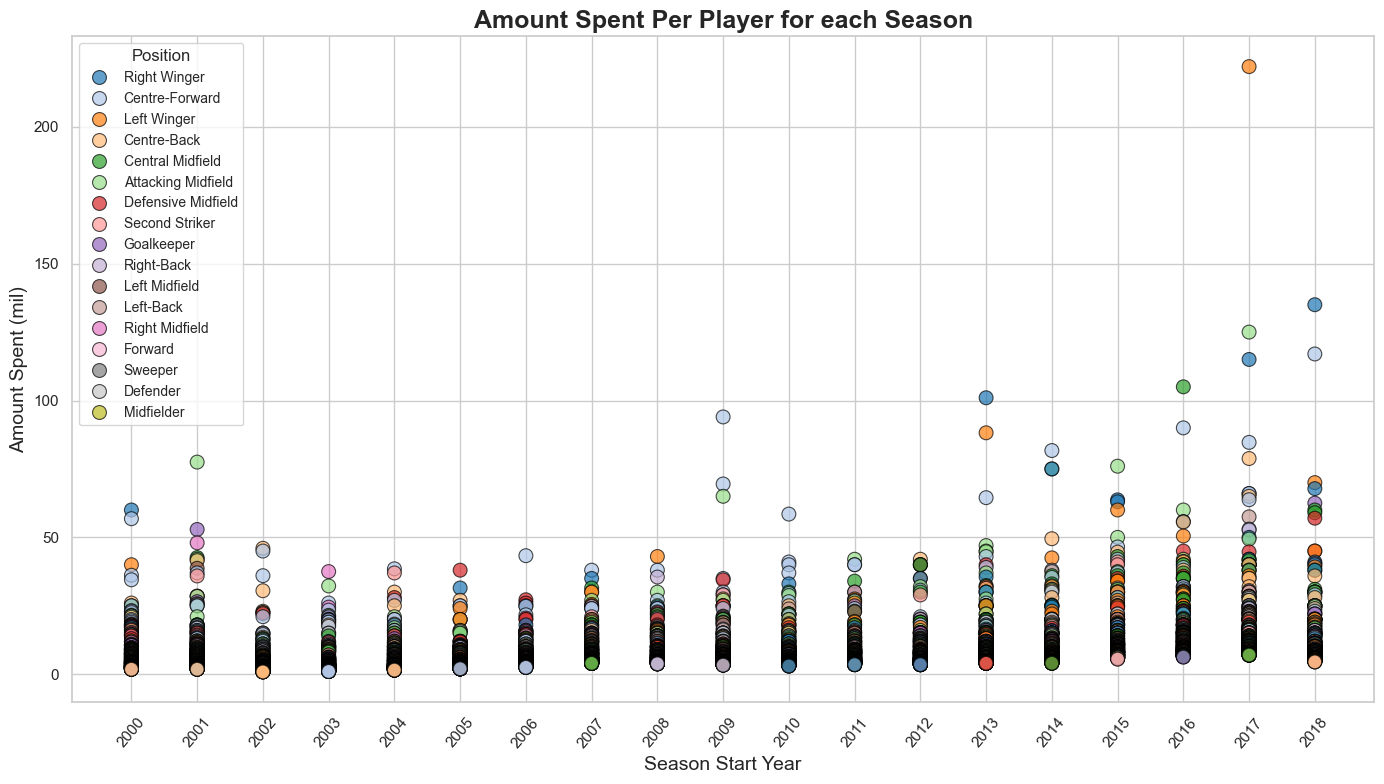

In [403]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df,x="Season Start", y="Actual Value (mil)", hue="Position", palette="tab20", s=100, alpha=0.7, edgecolor="black")

plt.title("Amount Spent Per Player for each Season", fontsize=18, weight="bold")
plt.xlabel("Season Start Year", fontsize=14)
plt.ylabel("Amount Spent (mil)", fontsize=14)

plt.xticks(ticks=sorted(df["Season Start"].unique()), rotation=50)

plt.legend(title="Position", loc="upper left", fontsize=10)
sns.set_theme(style="whitegrid", palette="muted")

plt.tight_layout()
plt.show()

### Insights

**Amount spend per player**
- Year 2017 was overall succesfull for players in terms of selling, however it laso contains multiple high values with all time high outlier more than 200 mil €.
- According position left and right winger tend to have high values but overall centre-forward or midfield players are also highly valuable.
- Players between 2001 and 2009 were not able to reach contract higher than 50 mil

### Position - Average value per position

In [400]:
avg_value_per_position = df.groupby("Position")["Actual Value (mil)"].mean().reset_index().sort_values(by="Actual Value (mil)", ascending=False)
print(avg_value_per_position)

              Position  Actual Value (mil)
9          Left Winger           12.904644
13        Right Winger           11.930361
1     Central Midfield           10.096242
0   Attacking Midfield            9.824178
3       Centre-Forward            9.596508
5   Defensive Midfield            8.992019
15      Second Striker            8.790154
2          Centre-Back            8.448592
14          Right-Back            8.254309
10           Left-Back            7.718933
7           Goalkeeper            7.622667
12      Right Midfield            7.404127
8        Left Midfield            6.717126
16             Sweeper            2.250000
6              Forward            2.200000
4             Defender            2.000000
11          Midfielder            1.130000


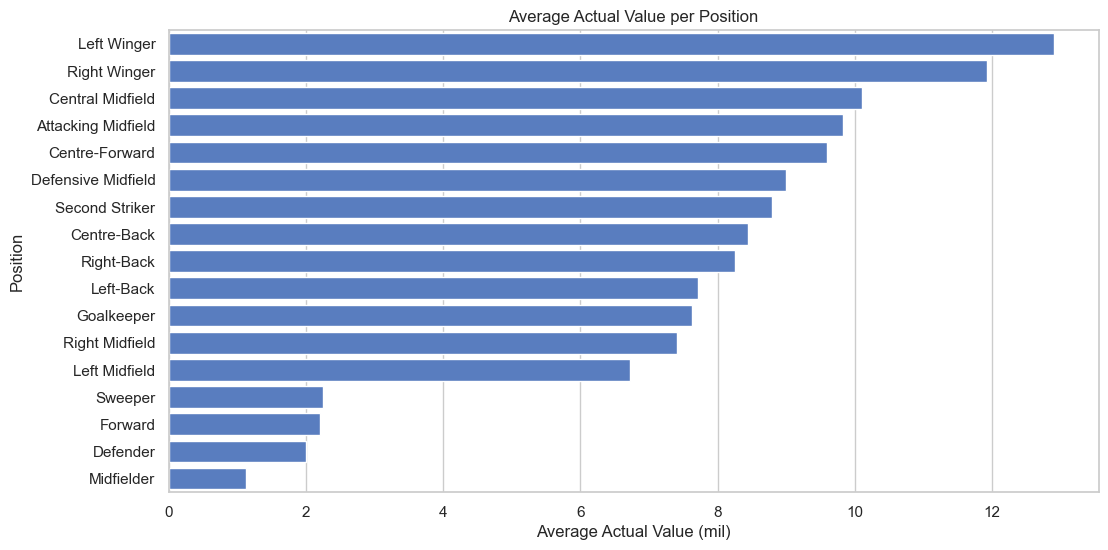

In [401]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Actual Value (mil)", y="Position", data=avg_value_per_position)
plt.title("Average Actual Value per Position")
plt.xlabel("Average Actual Value (mil)")
plt.ylabel("Position")
plt.show()

**Confirming position insights based on average and hue of the graph "Amount Spend Per Player for each Season"**

## Age - Average value based on age

In [94]:
age_avg_value = df.groupby("Age")["Actual Value (mil)"].mean().reset_index()

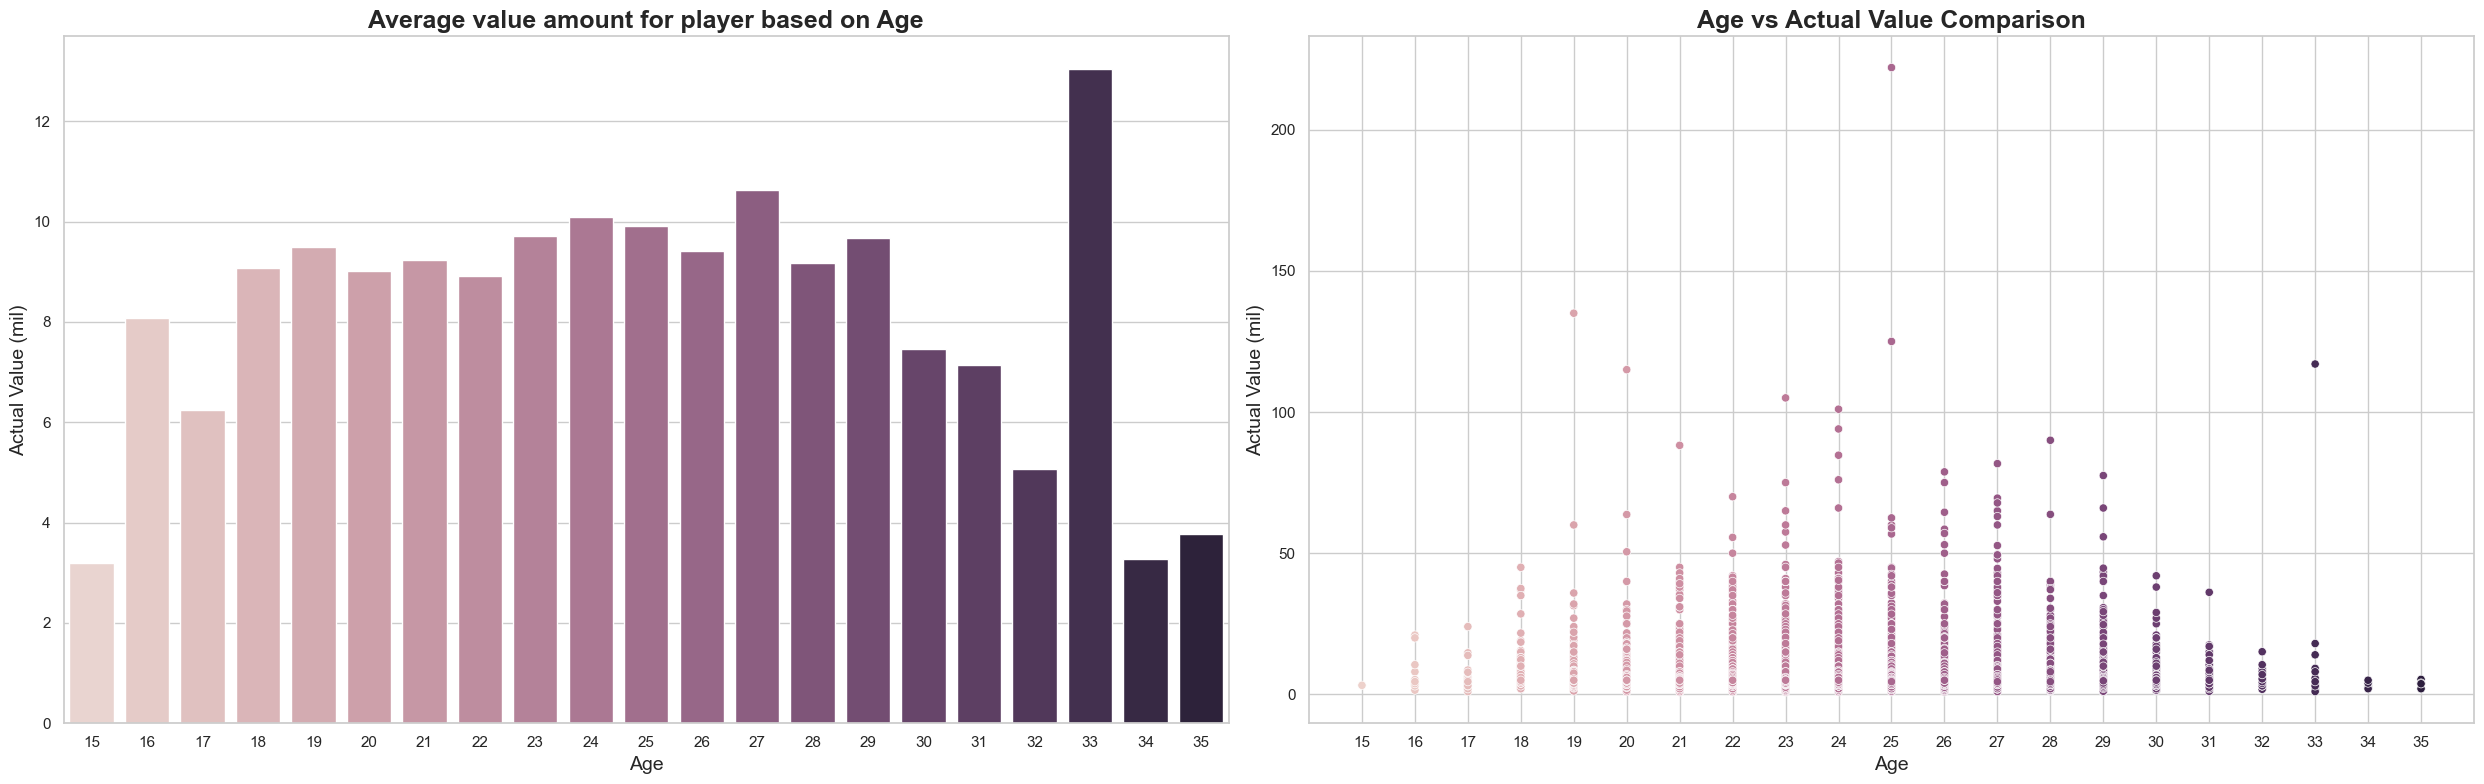

In [417]:
fig, axes = plt.subplots(1, 2, figsize=(25, 8))

sns.barplot(x="Age", y="Actual Value (mil)", data=age_avg_value, hue="Age", legend=False, ax=axes[0])

axes[0].set_title("Average value amount for player based on Age", fontsize=18, weight="bold")
axes[0].set_xlabel("Age", fontsize=14)
axes[0].set_ylabel("Actual Value (mil)", fontsize=14)

sns.scatterplot(x="Age", y="Actual Value (mil)", data=df, hue="Age", legend=False, ax=axes[1])

axes[1].set_title("Age vs Actual Value Comparison", fontsize=18, weight="bold")
axes[1].set_xlabel("Age", fontsize=14)
axes[1].set_ylabel("Actual Value (mil)", fontsize=14)

unique_ages = sorted(df["Age"].unique())
axes[1].set_xticks(unique_ages)

plt.tight_layout()
plt.show()

In [103]:
df_age=df[df["Age"] == 33]

In [104]:
df_age

,Player ID,Name,Position,Age,Original Team,Original League,New Team,New League,Season Start,Season End,Estimated Value (mil),Actual Value (mil)
420,Player_407,Gustavo Poyet,Attacking Midfield,33,Chelsea,Premier League,Spurs,Premier League,2001,2002,NaN,3.4
488,Player_471,Gheorghe Popescu,Centre-Back,33,Galatasaray,Süper Lig,Lecce,Serie A,2001,2002,NaN,2.0
829,Player_757,Jens Lehmann,Goalkeeper,33,Bor. Dortmund,1.Bundesliga,Arsenal,Premier League,2003,2004,NaN,3.5
854,Player_380,David James,Goalkeeper,33,West Ham,First Division,Man City,Premier League,2003,2004,NaN,2.8
897,Player_816,Óscar Córdoba,Goalkeeper,33,Boca Juniors,Argentina,Besiktas,Süper Lig,2003,2004,NaN,2.0
937,Player_852,Paul Bosvelt,Defensive Midfield,33,Feyenoord,Eredivisie,Man City,Premier League,2003,2004,NaN,1.5
982,Player_88,Pierre van Hooijdonk,Centre-Forward,33,Feyenoord,Eredivisie,Fenerbahce,Süper Lig,2003,2004,NaN,1.0
1059,Player_935,Francisco Lima,Defensive Midfield,33,AS Roma,Serie A,Loko Moscow,Premier Liga,2004,2005,NaN,5.7
1669,Player_261,Jaap Stam,Centre-Back,33,AC Milan,Serie A,AFC Ajax,Eredivisie,2006,2007,5.5,3.0
2638,Player_1973,Marco Storari,Goalkeeper,33,AC Milan,Serie A,Juventus,Serie A,2010,2011,1.5,4.5


### Insights

**Average Amount spend for Age**
1. Players started to have higher value around age 18-19 years and this continues until 27.
2. After age 27 the average value starts to decrease. This shows that with higher age the value of players goes down (there are outliers, so I consider them rather exceptions)
3. There was markant difference for players aged 33 years old. After further examination, it was rather effect of one outlier "Cristiano Ronaldo" who was in his age of 33 sold approximately 9 times above average value of player.

## League - total value of all players (mld) for league

In [126]:
total_league_amount = df.groupby("New League")["Actual Value (mil)"].sum().reset_index()
total_league_amount["Actual Value (mil)"] = total_league_amount["Actual Value (mil)"] / 1000
top_leagues = total_league_amount.nlargest(6, "Actual Value (mil)")

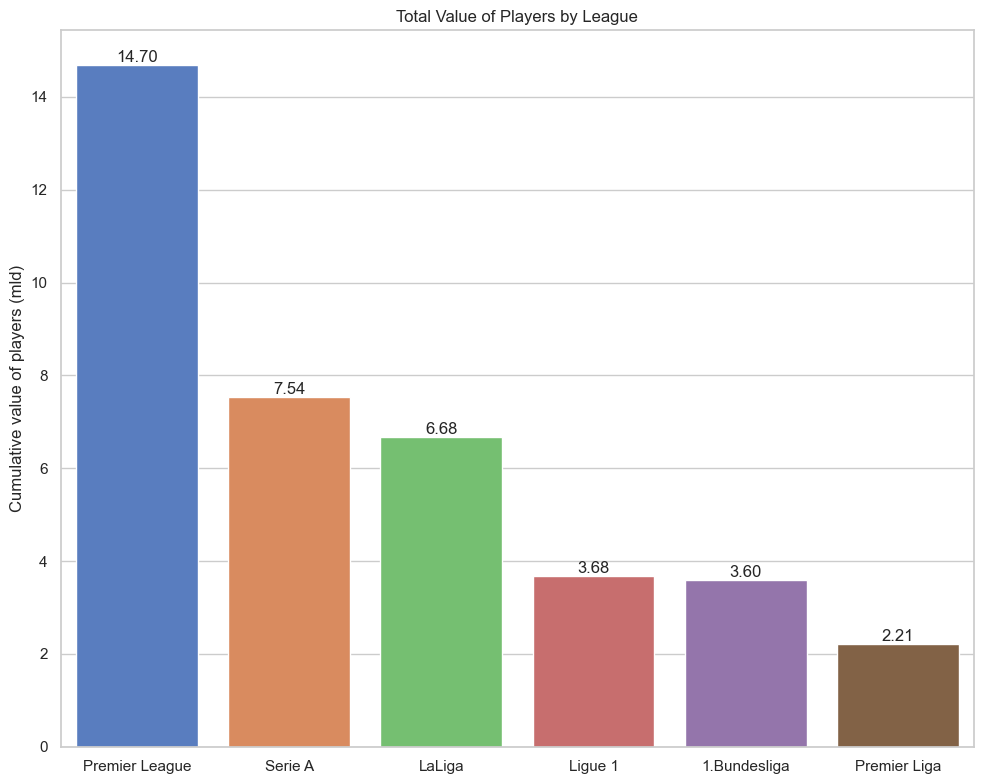

In [418]:
plt.figure(figsize=(10,8))
bar = sns.barplot(x="New League", y="Actual Value (mil)", data=top_leagues, hue="New League", legend=False)

plt.title("Total Value of Players by League")
plt.xlabel("")
plt.ylabel("Cumulative value of players (mld)")


for i in bar.containers:
    bar.bar_label(i, fmt="%.2f")

plt.tight_layout()
plt.show()

### Insights

**League insights**
- Premier league contains most of the high valued players (this league contain players with highest valuation in total)
- All of the leagues are primary main leagues in that particular country
    - Premier League = UK
    - Serie A = Italy
    - LaLiga = Spain
    - Ligue 1 = France
    - 1Bundesliga = Germany
    - Premier Liga = Russia

## Team - total + average value of players in Team (bought and sold) 

In [148]:
total_team_amount = df.groupby("New Team")["Actual Value (mil)"].sum().reset_index()
top_teams = total_team_amount.nlargest(15, "Actual Value (mil)")

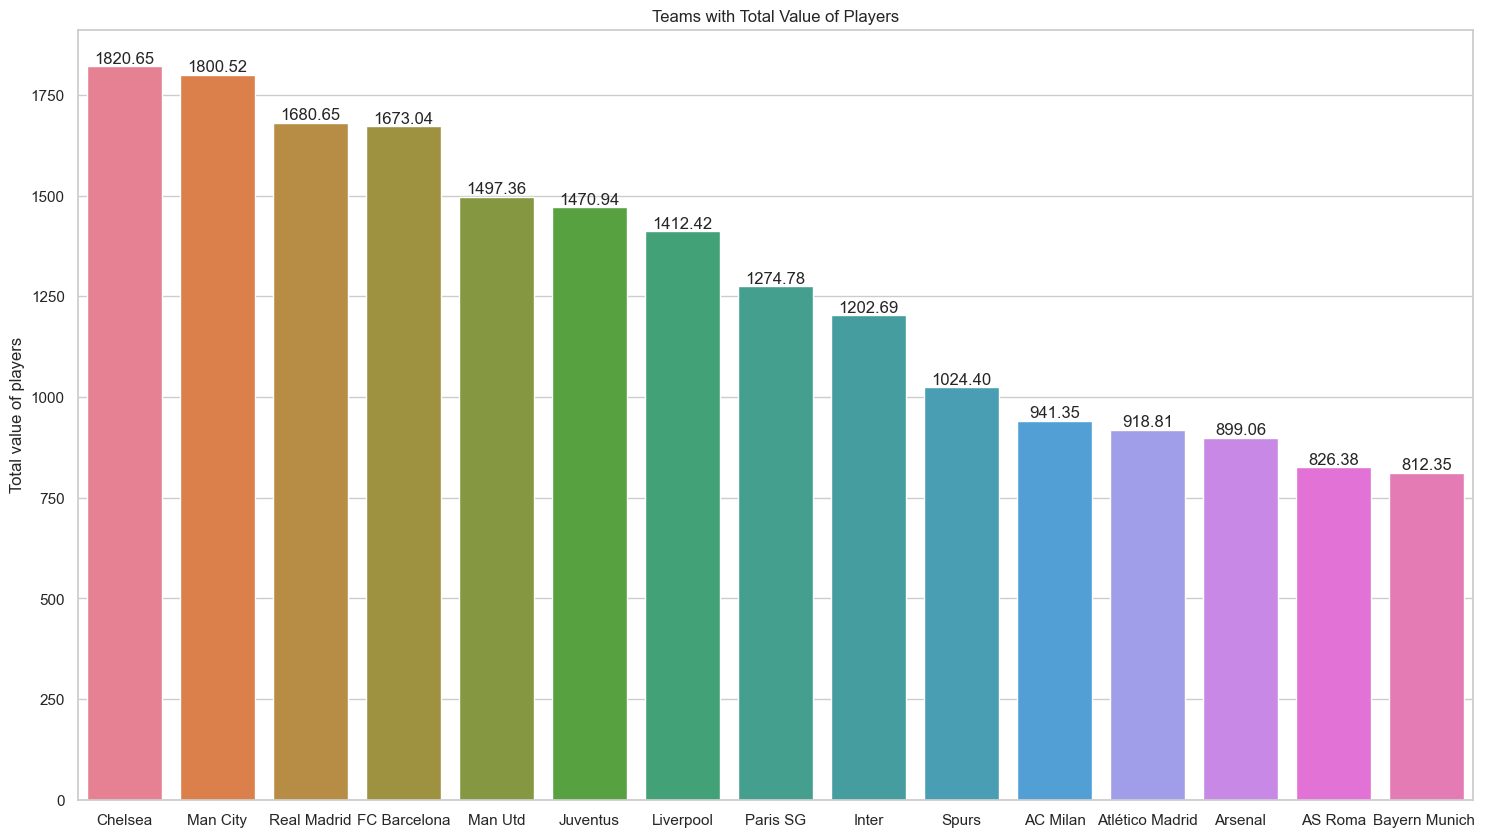

In [419]:
plt.figure(figsize=(18,10))
bar = sns.barplot(x="New Team", y="Actual Value (mil)", data=top_teams, hue="New Team", legend=False)

plt.title("Teams with Total Value of Players")
plt.xlabel("")
plt.ylabel("Total value of players")

for i in bar.containers:
    bar.bar_label(i, fmt="%.2f")

plt.show()

### Insights

**Team insights**
- This pretty much correspondet with league graph. Teams that buys post of the players are from UK league (Chelsea & Man City)
- Second highest buyers are from Spanish league (Real Madrid & FC Barcelona)
- Italy league teams are also close to top 10 (Juventus, Inter, AC Milan)
- Bayer Munich has value of players around 36,76% of entire german league


In [421]:
total_team_amount_sold = df.groupby("Original Team")["Actual Value (mil)"].sum().reset_index()
top_teams_sold = total_team_amount_sold.nlargest(15, "Actual Value (mil)")

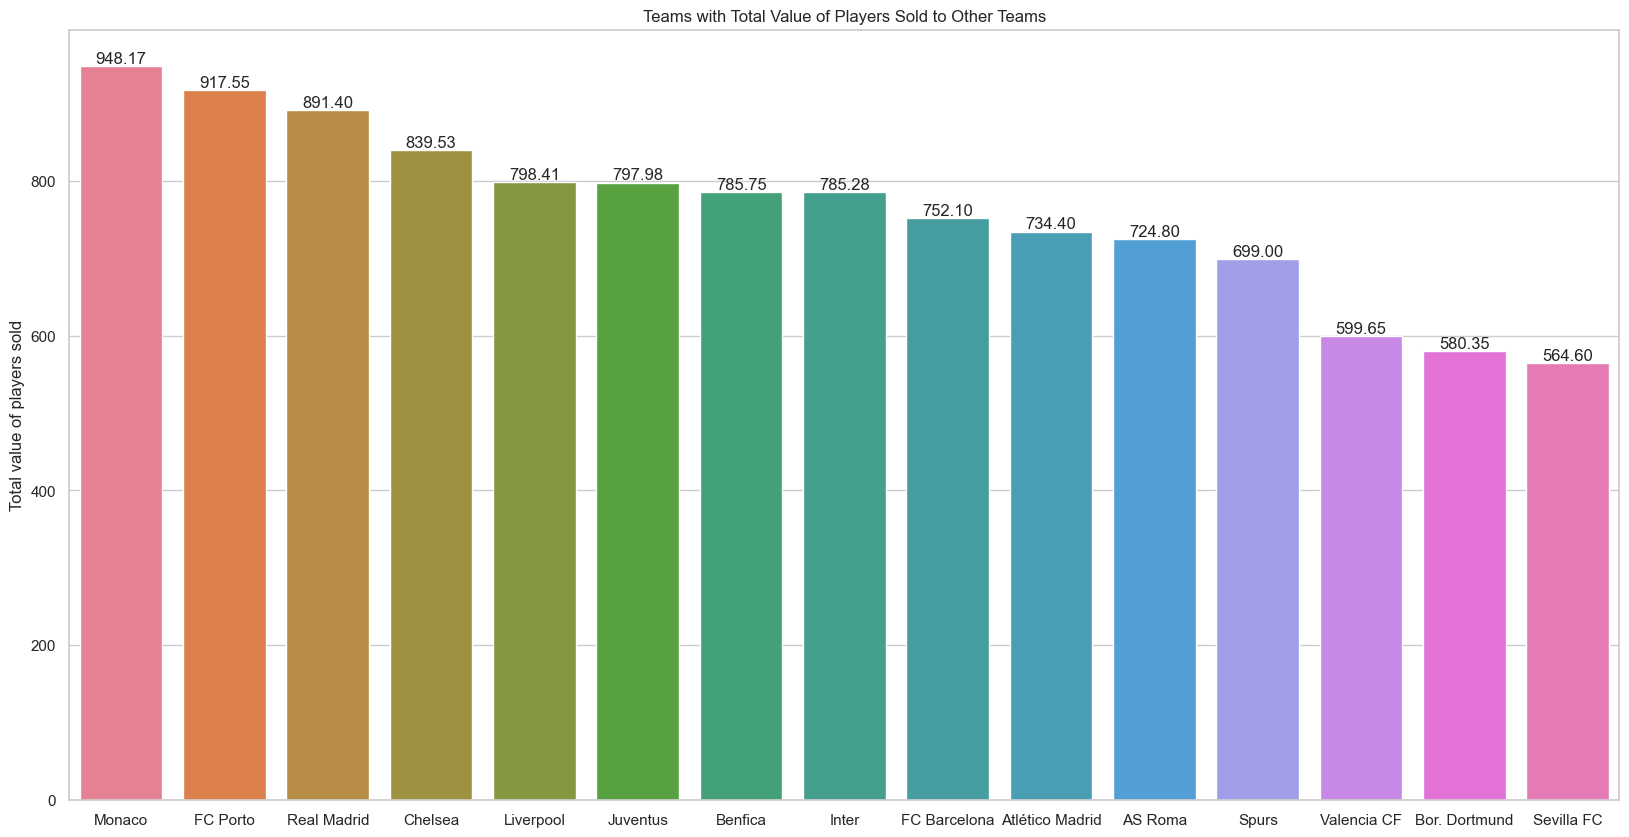

In [422]:
plt.figure(figsize=(20,10))
bar = sns.barplot(x="Original Team", y="Actual Value (mil)", data=top_teams_sold, hue="Original Team", legend=False)

plt.title("Teams with Total Value of Players Sold to Other Teams")
plt.xlabel("")
plt.ylabel("Total value of players sold")

for i in bar.containers:
    bar.bar_label(i, fmt="%.2f")

plt.show()

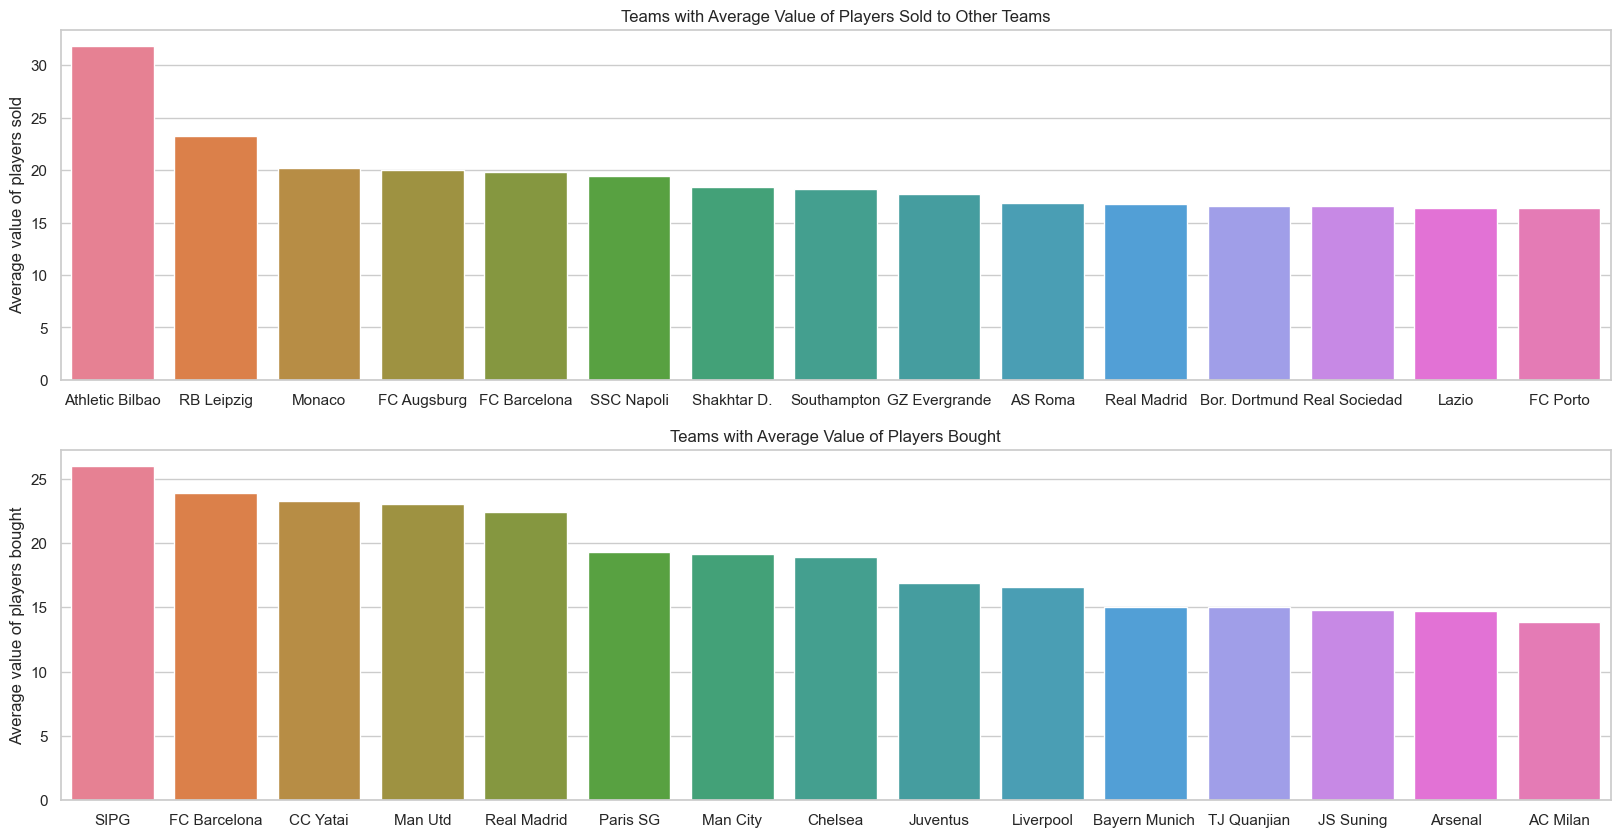

In [423]:
avg_teams_sold = (df.groupby("Original Team")["Actual Value (mil)"].mean().reset_index().nlargest(15, "Actual Value (mil)"))

avg_teams_buy = (df.groupby("New Team")["Actual Value (mil)"].mean().reset_index().nlargest(15, "Actual Value (mil)"))


fig, axes = plt.subplots(2, 1, figsize=(20, 10))  # Two rows, one column

# First plot
sns.barplot(x="Original Team", y="Actual Value (mil)", data=avg_teams_sold, hue="Original Team", ax=axes[0], dodge=False, legend=False)

axes[0].set_title("Teams with Average Value of Players Sold to Other Teams")
axes[0].set_xlabel("")
axes[0].set_ylabel("Average value of players sold")

# Second plot
sns.barplot(x="New Team", y="Actual Value (mil)", data=avg_teams_buy, hue="New Team", ax=axes[1], dodge=False, legend=False)

axes[1].set_title("Teams with Average Value of Players Bought")
axes[1].set_xlabel("")
axes[1].set_ylabel("Average value of players bought")

plt.show()


In [214]:
df_sold = df[df["Original Team"].isin(["Athletic Bilbao", "RB Leipzig", "Monaco"])].sort_values(by="Actual Value (mil)", ascending= False).head(30)
df_sold

,Player ID,Name,Position,Age,Original Team,Original League,New Team,New League,Season Start,Season End,Estimated Value (mil),Actual Value (mil)
4454,Player_3119,Kylian Mbappé,Right Winger,19,Monaco,Ligue 1,Paris SG,Ligue 1,2018,2019,120.0,135.00
3467,Player_1918,James Rodríguez,Attacking Midfield,23,Monaco,Ligue 1,Real Madrid,LaLiga,2014,2015,60.0,75.00
4456,Player_3120,Thomas Lemar,Left Winger,22,Monaco,Ligue 1,Atlético Madrid,LaLiga,2018,2019,65.0,70.00
4217,Player_2957,Aymeric Laporte,Centre-Back,23,Athletic Bilbao,LaLiga,Man City,Premier League,2017,2018,25.0,65.00
4459,Player_2814,Naby Keïta,Central Midfield,23,RB Leipzig,1.Bundesliga,Liverpool,Premier League,2018,2019,65.0,60.00
3715,Player_2452,Anthony Martial,Left Winger,19,Monaco,Ligue 1,Man Utd,Premier League,2015,2016,8.0,60.00
4219,Player_2483,Benjamin Mendy,Left-Back,23,Monaco,Ligue 1,Man City,Premier League,2017,2018,13.0,57.50
4222,Player_2503,Bernardo Silva,Right Winger,22,Monaco,Ligue 1,Man City,Premier League,2017,2018,40.0,50.00
4462,Player_2784,Fabinho,Defensive Midfield,24,Monaco,Ligue 1,Liverpool,Premier League,2018,2019,45.0,45.00
2971,Player_1275,Javi Martínez,Defensive Midfield,24,Athletic Bilbao,LaLiga,Bayern Munich,1.Bundesliga,2012,2013,30.0,40.00


In [213]:
df_bought = df[df["New Team"].isin(["SIPG", "FC Barcelona", "CC Yatai"])].sort_values(by="Actual Value (mil)", ascending= False).head(30)
df_bought

,Player ID,Name,Position,Age,Original Team,Original League,New Team,New League,Season Start,Season End,Estimated Value (mil),Actual Value (mil)
4211,Player_1719,Philippe Coutinho,Attacking Midfield,25,Liverpool,Premier League,FC Barcelona,LaLiga,2017,2018,90.0,125.00
4212,Player_2838,Ousmane Dembélé,Right Winger,20,Bor. Dortmund,1.Bundesliga,FC Barcelona,LaLiga,2017,2018,33.0,115.00
3217,Player_2336,Neymar,Left Winger,21,Santos FC,Série A,FC Barcelona,LaLiga,2013,2014,50.0,88.20
3466,Player_1456,Luis Suárez,Centre-Forward,27,Liverpool,Premier League,FC Barcelona,LaLiga,2014,2015,52.0,81.72
2226,Player_321,Zlatan Ibrahimovic,Centre-Forward,27,Inter,Serie A,FC Barcelona,LaLiga,2009,2010,45.0,69.50
3962,Player_1787,Oscar,Attacking Midfield,25,Chelsea,Premier League,SIPG,Super League,2016,2017,35.0,60.00
3963,Player_1644,Hulk,Right Winger,29,Zenit S-Pb,Premier Liga,SIPG,Super League,2016,2017,32.0,55.80
4464,Player_3123,Malcom,Right Winger,21,G. Bordeaux,Ligue 1,FC Barcelona,LaLiga,2018,2019,45.0,41.00
2,Player_3,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000,2001,NaN,40.00
2476,Player_577,David Villa,Centre-Forward,28,Valencia CF,LaLiga,FC Barcelona,LaLiga,2010,2011,45.0,40.00


### Insights

**Teams values and insights**
1. Teams with total value of players sold to other teams
    - Monaco is selling more players then buying. It pose as a farm where players after initial purchase gain value and are later sold at higher price to different teams.
    - FC Porto has the similar situation as Monaco
    - Real Madrid is selling with almost 50% of the total value of players. Seems to be that they are balancing their team to have highly valueable players to be in top leagues but also having budget by selling players
2. Teams with average value of players sold and bought to/by other teams
    - This can be little bit misleading as some teams purchase one player so their average is very high like in case of CC Yatai and on other hand some teams made lots of "mid" level purchasas like FC Barcelona and thus having almost the same average.
    - In case of Monaco it confirms that this team pose as the farm, making lots of "low" level sells with occassional high level sells
    - Based on data, FC Barcelona bought players offten from other spanish teams based.

## Correlation - metrics age and values

In [222]:
corr_cols = ["Age", "Estimated Value (mil)", "Actual Value (mil)"]

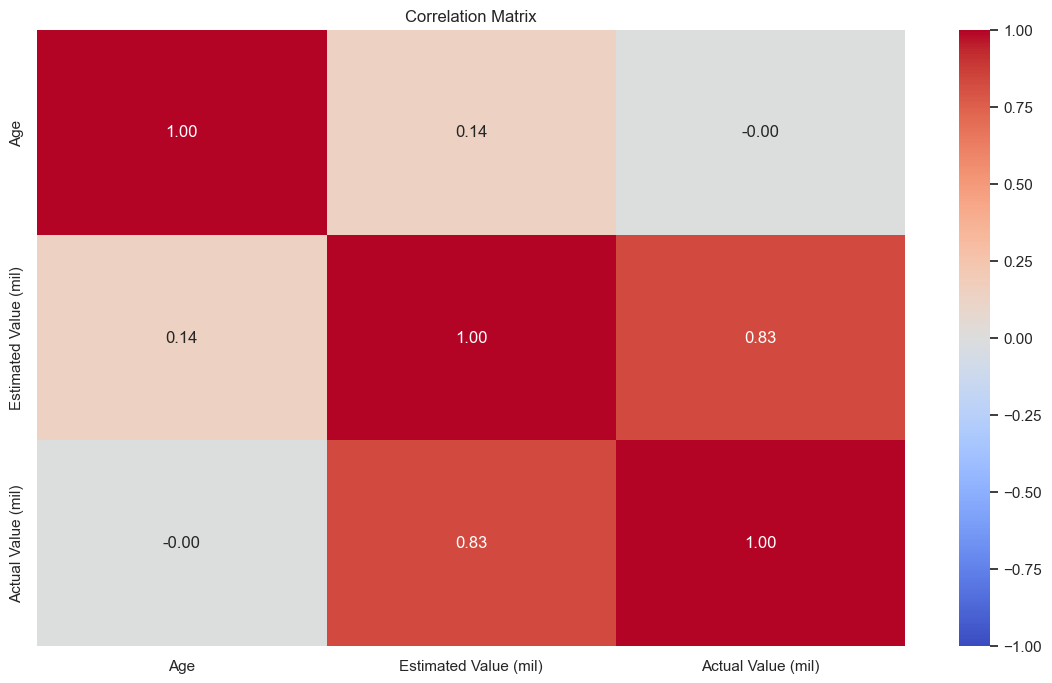

In [219]:
corr_matrix = df[corr_col].corr()

plt.figure(figsize=(14,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)

plt.title("Correlation Matrix")
plt.show()

In [223]:
corr_matrix_nan = df_nan[corr_cols].corr()

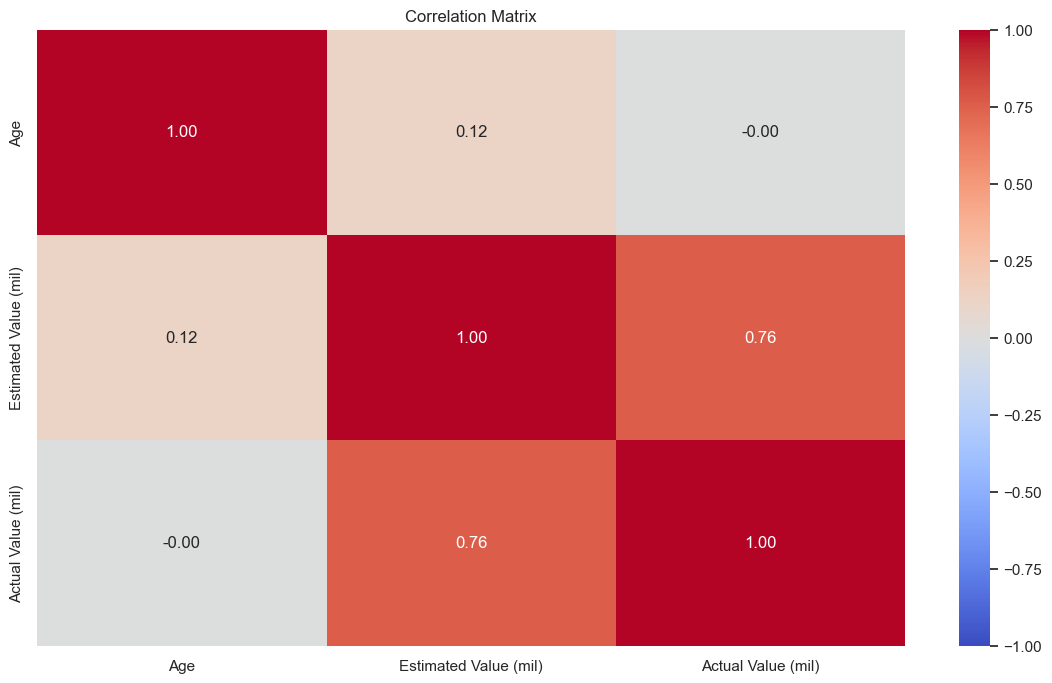

In [224]:
plt.figure(figsize=(14,8))
sns.heatmap(corr_matrix_nan, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)

plt.title("Correlation Matrix with imputed values")
plt.show()

### Insights

**Correlation insights**
- Age does not have a significant linear relationship with the actual transaction value only around 0.14, considered low correlation
- Estimated value is strongly correlated with the actual value, meaning it is a good indicator of what players are actually sold for
- I checked the correlation with estimated values in my dataset where I impute 0 instead of NaN. Correlation with actual value went slightly down but it is still pretty high correlation.

## Highest career values - total price across all time

In [272]:
career_values = (df.groupby("Player ID")["Actual Value (mil)"].sum().reset_index(name="Career Value (mil)"))
df_with_career_values = pd.merge(df, career_values, on="Player ID")

top_10_career = df_with_career_values.sort_values("Career Value (mil)", ascending=False).drop_duplicates("Player ID").head(10)
top_10_career

,Player ID,Name,Position,Age,Original Team,Original League,New Team,New League,Season Start,Season End,Estimated Value (mil),Actual Value (mil),Career Value (mil)
3217,Player_2336,Neymar,Left Winger,21,Santos FC,Série A,FC Barcelona,LaLiga,2013,2014,50.0,88.20,310.20
752,Player_696,Cristiano Ronaldo,Centre-Forward,18,Sporting CP,Liga NOS,Man Utd,Premier League,2003,2004,NaN,19.00,230.00
2478,Player_1447,Ángel Di María,Right Winger,22,Benfica,Liga NOS,Real Madrid,LaLiga,2010,2011,9.5,33.00,179.00
1482,Player_321,Zlatan Ibrahimovic,Centre-Forward,24,Juventus,Serie B,Inter,Serie A,2006,2007,25.0,24.80,163.10
3007,Player_1719,Philippe Coutinho,Attacking Midfield,20,Inter,Serie A,Liverpool,Premier League,2012,2013,9.0,13.00,141.80
3961,Player_1246,Gonzalo Higuaín,Centre-Forward,28,SSC Napoli,Serie A,Juventus,Serie A,2016,2017,65.0,90.00,141.00
3474,Player_2052,Romelu Lukaku,Centre-Forward,21,Chelsea,Premier League,Everton,Premier League,2014,2015,25.0,35.36,135.06
4454,Player_3119,Kylian Mbappé,Right Winger,19,Monaco,Ligue 1,Paris SG,Ligue 1,2018,2019,120.0,135.00,135.00
4045,Player_2838,Ousmane Dembélé,Right Winger,19,Stade Rennais,Ligue 1,Bor. Dortmund,1.Bundesliga,2016,2017,12.0,15.00,130.00
2554,Player_1918,James Rodríguez,Attacking Midfield,18,CA Banfield,Torneo Final,FC Porto,Liga NOS,2010,2011,2.5,7.35,127.35


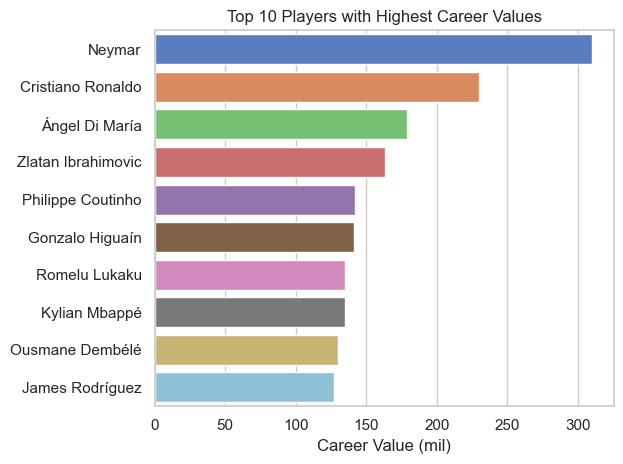

In [376]:
sns.barplot(data=top_10_career_outliers, x="Career Value (mil)", y="Name", hue="Name", legend=False)
plt.title("Top 10 Players with Highest Career Values")
plt.xlabel("Career Value (mil)")
plt.ylabel("")
plt.tight_layout()
plt.show()

### Insights

**Career values**
- This can showcase players who were bought with high value contracts during their carrer. It is their total value accross seasons, leagues and teams. 
- Neymar is the most expensive one. Ronaldo is right behind, but still with more than 80 millions gap. Zlatan is on the fourth place with 163 mil.€ worth of contracts. Amount of transaction can be interesting feature.
- The players started almost always with lower estimation value, eventually having higher actual value (data obviously shows only first appearence while calculating, so it is not precise). In total, some of them were after multiple transfers valued very highly e.g. Ángel Di Maria who in total raised his value against estimation up to 1784%
- The recorder is also James Rodrígues who raised his value against estimation up to 4994% and against actual value still more than 1632%.

## Most traded players

In [411]:
df_cumulative = df
df_cumulative["Cumulative Price (mil)"] = df.groupby("Player ID")["Actual Value (mil)"].cumsum()
df_cumulative = df_cumulative.sort_values(by="Cumulative Price (mil)", ascending=False)

most_traded_players = df.groupby("Player ID").size().reset_index(name="Transaction Count")
top_10_most_traded = most_traded_players.nlargest(10, "Transaction Count")

df_top_10 = pd.merge(df_sorted, top_10_most_traded, on="Player ID")
df_top_10_sorted = df_top_10.sort_values(by="Transaction Count", ascending=False)
df_top_10_unique = df_top_10_sorted.drop_duplicates(subset="Player ID", keep="first")

df_top_10_unique

,Player ID,Name,Position,Age,Original Team,Original League,New Team,New League,Season Start,Season End,Estimated Value (mil),Actual Value (mil),Cumulative Price (mil),Transaction Count
0,Player_321,Zlatan Ibrahimovic,Centre-Forward,30,AC Milan,Serie A,Paris SG,Ligue 1,2012,2013,37.0,21.00,163.10,6
3,Player_17,Robbie Keane,Centre-Forward,31,Spurs,Premier League,Los Angeles,MLS,2011,2012,7.0,3.75,92.45,6
5,Player_900,Carlos Tévez,Second Striker,32,Boca Juniors,Primera División,SH Shenhua,Super League,2016,2017,8.5,10.50,84.60,6
8,Player_394,Alberto Gilardino,Centre-Forward,32,Genoa,Serie A,GZ Evergrande,Super League,2014,2015,5.0,5.50,68.37,6
12,Player_55,Craig Bellamy,Left Winger,29,West Ham,Premier League,Man City,Premier League,2008,2009,7.5,15.50,61.50,6
14,Player_329,Peter Crouch,Centre-Forward,30,Spurs,Premier League,Stoke City,Premier League,2011,2012,10.0,11.30,56.50,6
20,Player_1718,Sokratis,Centre-Back,30,Bor. Dortmund,1.Bundesliga,Arsenal,Premier League,2018,2019,20.0,16.00,41.70,6
24,Player_1547,Dimitri Payet,Attacking Midfield,28,Marseille,Ligue 1,West Ham,Premier League,2015,2016,13.0,15.00,36.70,5
22,Player_1576,Thiago Neves,Attacking Midfield,30,Hilal,Professional League,Al-Jazira,UAE Gulf League,2015,2016,4.0,11.00,40.00,5
25,Player_1449,Kevin-Prince Boateng,Central Midfield,26,AC Milan,Serie A,FC Schalke 04,1.Bundesliga,2013,2014,15.0,10.00,35.60,5


### Insights

**Transaction Values**
- Purpose was to determine which players was sold/bought most times. And what was his cumulative price (similar to career values but now I focus on players with highest amount of transactions)
- Zlatan was sold most times with highest cumulative value. 